In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan  8 10:43:48 2021

@author: ellen
"""

# finde path to all pictures ending with "pattern" - *_1.jpg
import re
import os, fnmatch, facemorpher
from pyagender import PyAgender
import cv2
from PIL import Image
import face_recognition
import time
import numpy as np


def find2(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def average(pictures):
    facemorpher.averager(pictures, plot=True)
    
def morphing(orginele_foto, morph_foto):
    #agender = PyAgender()
    #faces = agender.detect_genders_ages(cv2.imread(orginele_foto))
    #original_age = faces[0]['age']
    pictures = [orginele_foto, morph_foto]
    facemorpher.morpher(pictures, plot=True, out_frames='output')
    # Output is fotos in de folder /output
    
    
def age_estimation(foto):
    agender = PyAgender()
    faces = agender.detect_genders_ages(cv2.imread(foto))
    age = faces[0]['age']
    return round(age)
    
def age_estimation_group(foto_list):
    age_group_detected = []
    age_group_actual = []
    for x in foto_list:
        age = age_estimation(x)
        age_group_detected.append(age)
        age_group_actual.append(x.split("_")[1])
    return age_group_detected, age_group_actual
    
def Face_recognition(known, test):
    known_image = face_recognition.load_image_file(known)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_encodings = [face_encoding]
    image_to_test = face_recognition.load_image_file(test)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    
    for i, face_distance in enumerate(face_distances):
        print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
        print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
        print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
        print()
    return face_distance

def after_morphing(morph, path):
    age_after_morph = []
    face_distance_after_morph = []
    face_distance_before_morph =[]
    actual_age = []
    age_before_morph = []
    result = find2("*_1.png", path)
    save_name = morph.split("/")[-1].replace('.png','.npz')
    for i in result:
        start = time.time()
        morphing(i, morph)
        age_after_morph.append(age_estimation("output/frame009.png"))
        face_distance_after_morph.append(Face_recognition(i.replace("_1.png", ".png"), "output/frame009.png" ))
        face_distance_before_morph.append(Face_recognition(i.replace("_1.png", ".png"), i ))
        actual_age.append(int(i.split("_")[2]))
        age_before_morph.append(age_estimation(i))
        print(age_after_morph)
        print(face_distance_after_morph)
        print(actual_age)
        stop = time.time()
        print(stop-start)
    np.savez(save_name, age_after_morph=age_after_morph,age_before_morph=age_before_morph, actual_age=actual_age, face_dist_after = face_distance_after_morph, face_dist_before=face_distance_before_morph)
   # Plots_print()
    #return age_after_morph, face_distance_after_morph, actual_age, face_distance_before_morph, age_before_morph

def read_npz_after_morph(file):
    x = np.load(file, mmap_mode='r')

    actual_age = x['actual_age'] # Array with actual ages
    age_after_morph = x['age_after_morph'] # Array with detected ages after morphing
    age_before_morph = x['age_before_morph'] # Array with detected ages before morphing
    face_dist_after = x['face_dist_after'] # Face distance after morphing
    face_dist_before = x['face_dist_before'] # Face distance before morphing
    
    return actual_age, age_after_morph, age_before_morph, face_dist_after, face_dist_before

Using TensorFlow backend.


In [2]:
# load old data
age_actual, age_morph20o, age_estimated, face_dist_after20o, face_dist_before20o = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Data_npz/average20_30_N3(1).npz")
age_actual, age_morph30o, age_estimated, face_dist_after30o, face_dist_before30o = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Data_npz/average30_40_N3(0).npz")
age_actual, age_morph40o, age_estimated, face_dist_after40o, face_dist_before40o = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Data_npz/average40_50_N3(0).npz")
age_actual, age_morph50o, age_estimated, face_dist_after50o, face_dist_before50o = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Data_npz/average50_60_N3(0).npz")

#age_actual, same for every group
#age_estimated, same for every group, estimated age (no morphing)



In [3]:
# load new data
age_actual, age_morph10, age_estimated, face_dist_after10, face_dist_before10 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average10_20_handpicked.npz")
age_actual, age_morph20, age_estimated, face_dist_after20, face_dist_before20 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average20_30_handpicked.npz")
age_actual, age_morph30, age_estimated, face_dist_after30, face_dist_before30 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average30_40_handpicked.npz")
age_actual, age_morph40, age_estimated, face_dist_after40, face_dist_before40 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average40_50_handpicked.npz")
age_actual, age_morph50, age_estimated, face_dist_after50, face_dist_before50 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average50_60_handpicked.npz")
age_actual, age_morph60, age_estimated, face_dist_after60, face_dist_before60 = read_npz_after_morph("/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average60_70_handpicked.npz")


#age_actual, same for every group
#age_estimated, same for every group, estimated age (no morphing)



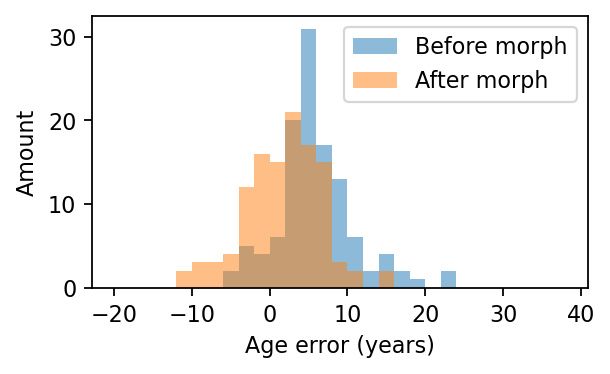

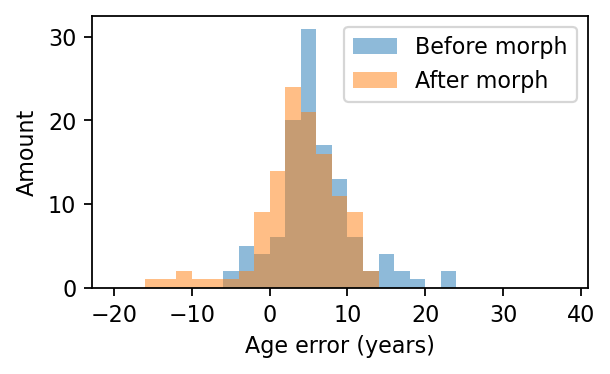

<Figure size 432x288 with 0 Axes>

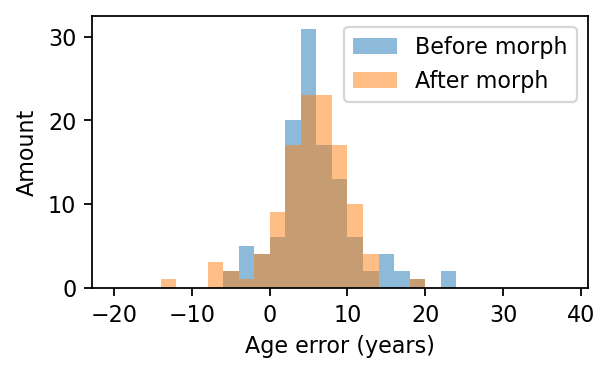

<Figure size 432x288 with 0 Axes>

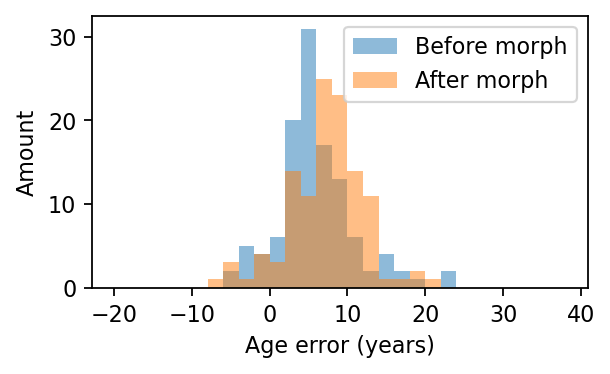

<Figure size 432x288 with 0 Axes>

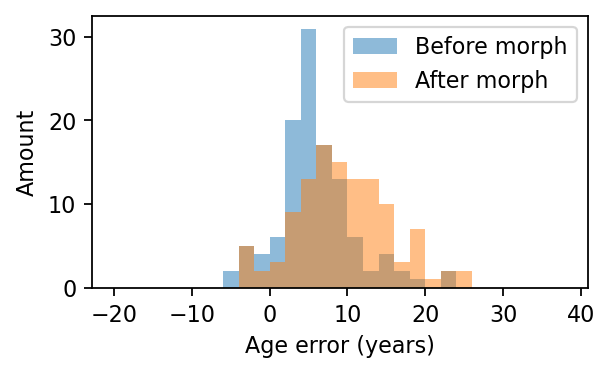

<Figure size 432x288 with 0 Axes>

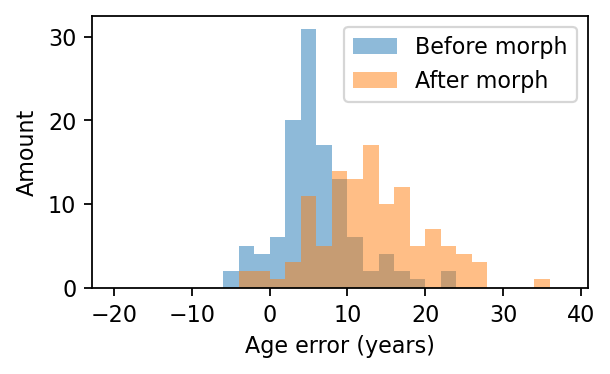

In [40]:
import matplotlib.pyplot as plt

#Age error distributions after morphing per age group
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph10 - age_actual, bins, alpha=0.5, label='After morph')
#plt.hist(age_morph20o - age_actual, bins, alpha=0.5, label='Old data')
#plt.title('Age error distribution, before and after morphing with age group 20 - 30')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group10.png',bbox_inches='tight')
plt.show()

#Age error distributions after morphing per age group
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph20 - age_actual, bins, alpha=0.5, label='After morph')
#plt.hist(age_morph20o - age_actual, bins, alpha=0.5, label='Old data')
#plt.title('Age error distribution, before and after morphing with age group 20 - 30')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group20.png', bbox_inches='tight')
plt.show()

plt.figure()
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph30 - age_actual, bins, alpha=0.5, label='After morph')
#plt.hist(age_morph30o - age_actual, bins, alpha=0.5, label='Old data')
#plt.title('Age error distribution, before and after morphing with age group 30 - 40')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group30.png', bbox_inches='tight')
plt.show()

plt.figure()
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph40 - age_actual, bins, alpha=0.5, label='After morph')
#plt.hist(age_morph40o - age_actual, bins, alpha=0.5, label='Old data')
#plt.title('Age error distribution, before and after morphing with age group 40 - 50')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group40.png', bbox_inches='tight')
plt.show()


plt.figure()
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph50 - age_actual, bins, alpha=0.5, label='After morph')
#plt.hist(age_morph50o - age_actual, bins, alpha=0.5, label='Old data')
#plt.title('Age error distribution, before and after morphing with age group 50 - 60')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group50.png', bbox_inches='tight')
plt.show()

plt.figure()
bins = np.arange(-20, 40, 2) #left margin, right margin, step size (years)
plt.figure(figsize=(4,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated - age_actual, bins, alpha=0.5, label='Before morph')
plt.hist(age_morph60 - age_actual, bins, alpha=0.5, label='After morph')
#plt.title('Age error distribution, before and after morphing with age group 60 - 70')
plt.xlabel('Age error (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_group60.png', bbox_inches='tight')
plt.show()

In [11]:
print(np.mean(age_morph10))
print(np.mean(age_morph20))
print(np.mean(age_morph30))
print(np.mean(age_morph40))
print(np.mean(age_morph50))
print(np.mean(age_morph60))
print(np.mean(age_estimated))

24.234782608695653
26.321739130434782
27.94782608695652
29.85217391304348
32.07826086956522
35.59130434782609
28.36521739130435


In [10]:
error10 = 0
error20 = 0
error30 = 0
error40 = 0
error50 = 0
error60 = 0
error = 0
for i in range(len(age_morph20)):
    error = error + abs(age_estimated[i]-age_actual[i])
    error10 = error10 + abs(age_morph10[i]-age_actual[i])
    error20 = error20 + abs(age_morph20[i]-age_actual[i])
    error30 = error30 + abs(age_morph30[i]-age_actual[i])
    error40 = error40 + abs(age_morph40[i]-age_actual[i])
    error50 = error50 + abs(age_morph50[i]-age_actual[i])
    error60 = error60 + abs(age_morph60[i]-age_actual[i])
    
print(error10/len(age_morph10))    
print(error20/len(age_morph20))
print(error30/len(age_morph20))
print(error40/len(age_morph20))
print(error50/len(age_morph20))
print(error60/len(age_morph20))
print(error/len(age_morph20))

4.017391304347826
4.939130434782609
5.834782608695652
7.408695652173913
9.391304347826088
12.71304347826087
5.904347826086957


In [59]:
import numpy as np

file = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average40_50_handpicked_dist_to_morph.npz'
x = np.load(file, mmap_mode='r')
morph1 = x['dist_morph1'] 
morph2 = x['dist_morph2'] 
morph3 = x['dist_morph3'] 

file = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/Final data/average50_60_handpicked_dist_to_morph.npz'
x = np.load(file, mmap_mode='r')
morph4 = x['dist_morph1'] 
morph5 = x['dist_morph2'] 
morph6 = x['dist_morph3'] 

print(np.mean(morph1))
print(np.mean(morph2))
print(np.mean(morph3))
print(np.mean(morph4))
print(np.mean(morph5))
print(np.mean(morph6))
morph = [morph1, morph2, morph3, morph4, morph5, morph6]
print(np.mean(morph))
print(np.std(morph))
    

0.7381546857327386
0.8075136205792847
0.7269425911393705
0.7688334773986635
0.7968448258024066
0.7218963616787926
0.7600309270552095
0.0695654151804884


In [60]:
print(np.mean(face_dist_after10))
print(np.mean(face_dist_after20))
print(np.mean(face_dist_after30))
print(np.mean(face_dist_after40))
print(np.mean(face_dist_after50))
print(np.mean(face_dist_after60))

0.4617060456731035
0.4331863652441699
0.4629011388686473
0.4535793957893936
0.45475873750971624
0.4356824366959441


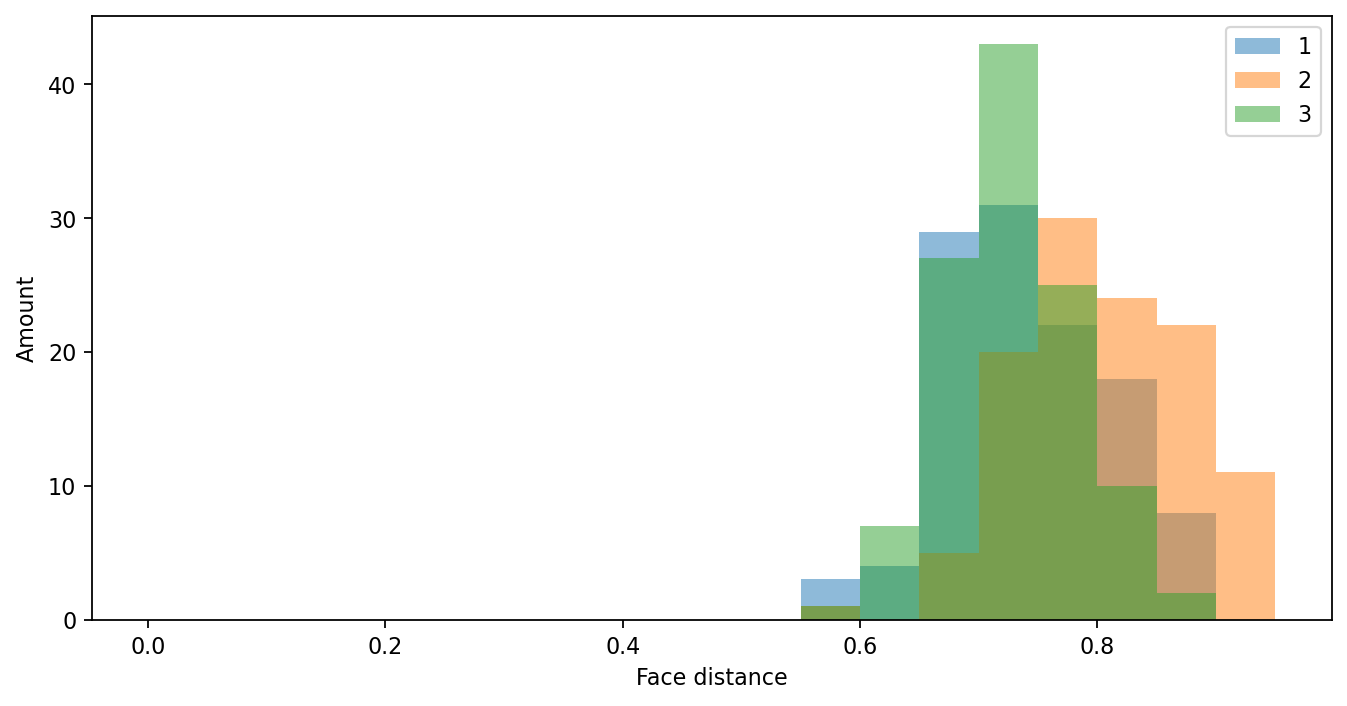

In [11]:
import matplotlib.pyplot as plt


bins = np.arange(0, 1, 0.05) #left margin, right margin, step size (years)
plt.figure(figsize=(10,5), dpi=160)
plt.hist(morph1, bins, alpha=0.5, label='1')
plt.hist(morph2, bins, alpha=0.5, label='2')
plt.hist(morph3, bins, alpha=0.5, label='3')
#plt.title('Age error distribution, before and after morphing with age group 20 - 30')
plt.xlabel('Face distance')
plt.ylabel('Amount')
plt.legend()
#plt.savefig('age_distribution_group20.png')
plt.show()

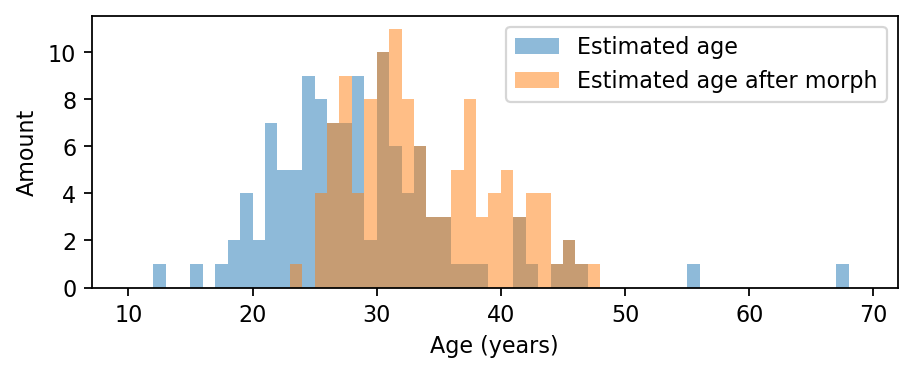

In [52]:
#Special morph!
special_morph = []
for i in range(0,len(age_actual)):
    if age_actual[i] < 25:
        special_morph.append(age_morph60[i])
    elif age_actual[i] >= 35:
        special_morph.append(age_morph10[i])
    else:
        special_morph.append(age_morph20[i])
special_morph = np.array(special_morph)
        
bins = np.arange(10, 70, 1)
plt.figure(figsize=(6.5,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated, bins, alpha=0.5, label='Estimated age')
plt.hist(special_morph, bins, alpha=0.5, label='Estimated age after morph')
#plt.title('Age distribution of dataset')
plt.xlabel('Age (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_estimated_special10-60.png', bbox_inches='tight')

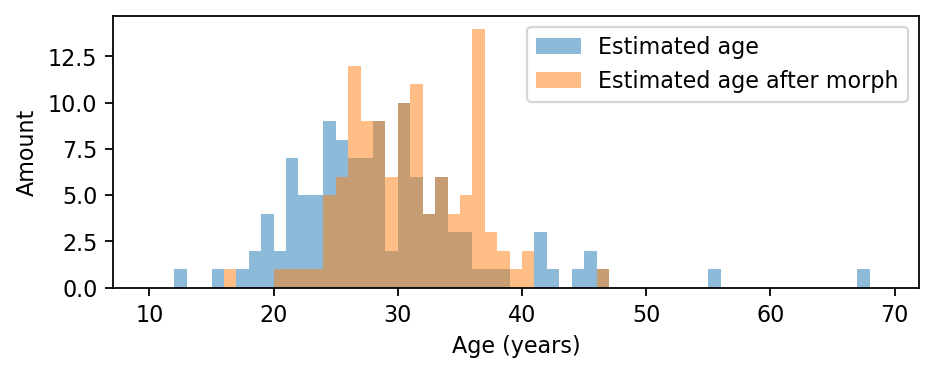

In [48]:
#Special morph!
special_morph = []
for i in range(0,len(age_actual)):
    if age_actual[i] < 25:
        special_morph.append(age_morph50[i])
    elif age_actual[i] >= 35:
        special_morph.append(age_morph20[i])
    else:
        special_morph.append(age_morph20[i])
special_morph = np.array(special_morph)
        
bins = np.arange(10, 70, 1)
plt.figure(figsize=(6.5,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated, bins, alpha=0.5, label='Estimated age')
plt.hist(special_morph, bins, alpha=0.5, label='Estimated age after morph')
#plt.title('Age distribution of dataset')
plt.xlabel('Age (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_estimated_special20-50.png', bbox_inches='tight')

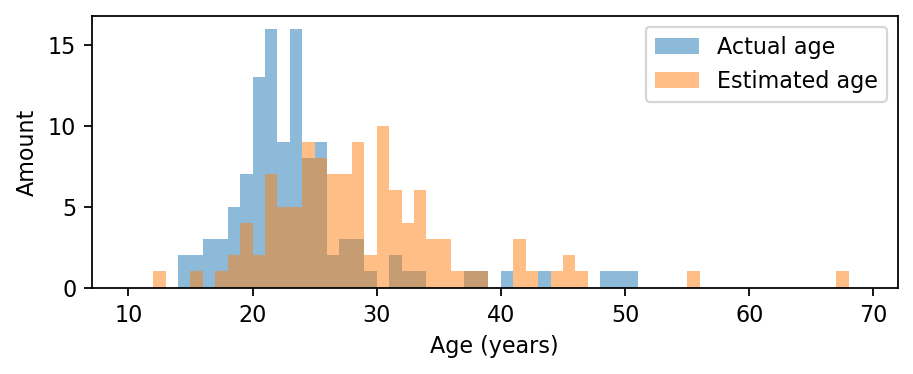

In [42]:
#Age distribution
bins = np.arange(10, 70, 1)
plt.figure(figsize=(6.5,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_actual, bins, alpha=0.5, label='Actual age')
plt.hist(age_estimated, bins, alpha=0.5, label='Estimated age')

#plt.title('Age distribution of dataset')
plt.xlabel('Age (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_actual_estimated.png', bbox_inches='tight')

In [18]:
photo1 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/61_Mark_Hamill_0001.jpg'
photo2 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/61_Mary_McDonnell_0007.jpg'
photo3 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/62_David_Patrick_Kelly_0001.jpg'
avg = "/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/averages/average60_70_handpicked.png"

dist1 = Face_recognition(avg, photo1)
dist2 = Face_recognition(avg, photo2)
dist3 = Face_recognition(avg, photo3)

The test image has a distance of 0.69 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False

The test image has a distance of 0.6 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False

The test image has a distance of 0.74 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False



In [19]:
photo1 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/53_Dylan_Baker_0001.jpg'
photo2 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/53_Fran_Drescher_0005.jpg'
photo3 = '/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/CACD2000/57_David_Hasselhoff_0005.jpg'
avg = "/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/averages/average50_60_handpicked.png"

dist1 = Face_recognition(avg, photo1)
dist2 = Face_recognition(avg, photo2)
dist3 = Face_recognition(avg, photo3)

The test image has a distance of 0.59 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? False

The test image has a distance of 0.68 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False

The test image has a distance of 0.63 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? False
- With a very strict cutoff of 0.5, would the test image match the known image? False



/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/SiblingsDB/SiblingsDB_preproccesed/248_18.png
/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/averages/average60_70_handpicked.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


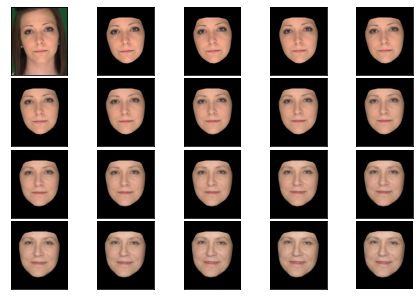

38.0


In [36]:
photo = "/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/SiblingsDB/SiblingsDB_preproccesed/248_18.png"
morph = "/Users/ellen/Documents/GitHub/Age-Obfuscation-Morphing/averages/average60_70_handpicked.png"

morphing(photo,morph)
print(age_estimation(photo))

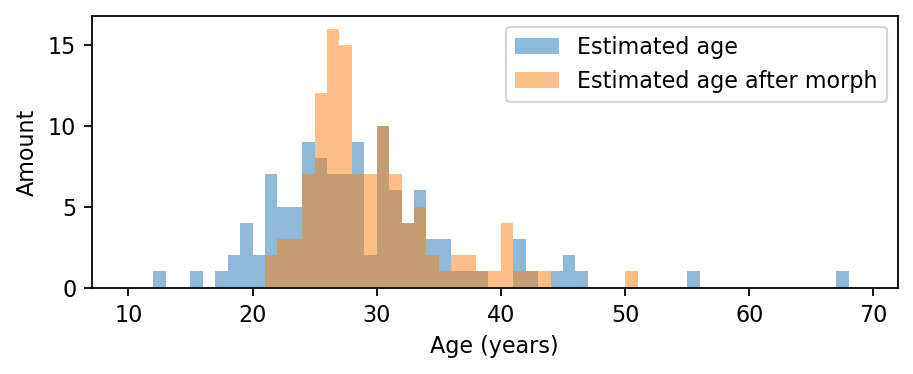

In [54]:
#Special morph!
special_morph = []
for i in range(0,len(age_actual)):
    if age_estimated[i] < 25:
        special_morph.append(age_morph60[i])
        
    elif age_estimated[i] >= 35:
        special_morph.append(age_morph10[i])
    else:
        special_morph.append(age_morph20[i])
special_morph = np.array(special_morph)
        
bins = np.arange(10, 70, 1)
plt.figure(figsize=(6.5,2.5), dpi=160)
plt.gcf().subplots_adjust(bottom=0.20)
plt.hist(age_estimated, bins, alpha=0.5, label='Estimated age')
plt.hist(special_morph, bins, alpha=0.5, label='Estimated age after morph')
#plt.title('Age distribution of dataset')
plt.xlabel('Age (years)')
plt.ylabel('Amount')
plt.legend()
plt.savefig('age_distribution_estimated_special_est_10-60.png', bbox_inches='tight')